In [61]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input

In [62]:
# Define paths
train_dir = 'train/'
test_dir = 'test/'

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Only rescale for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42
)


Found 18470 images belonging to 5 classes.


In [64]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)

# Build the CNN model
model = Sequential([
    Input(shape=(48, 48, 1)),  # Add an Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 7 classes for emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=30)  # Adjust epochs as needed

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

Found 5100 images belonging to 5 classes.
Epoch 1/30


C:\Users\HP VICTUS 15\anaconda3\envs\AI\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.3779 - loss: 1.4369 - val_accuracy: 0.3537 - val_loss: 1.4418
Epoch 2/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.3923 - loss: 1.3923 - val_accuracy: 0.3661 - val_loss: 1.3981
Epoch 3/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.4079 - loss: 1.3628 - val_accuracy: 0.4288 - val_loss: 1.3076
Epoch 4/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.4522 - loss: 1.2907 - val_accuracy: 0.5176 - val_loss: 1.1899
Epoch 5/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.4868 - loss: 1.2253 - val_accuracy: 0.5425 - val_loss: 1.1249
Epoch 6/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.5289 - loss: 1.1621 - val_accuracy: 0.5225 - val_loss: 1.1427
Epoch 7/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.5450 - loss: 1.1251 - val_accuracy: 0.5592 - val_loss: 1.0771
Epoch 8/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.5562 - loss: 1.1014 - val_accurac

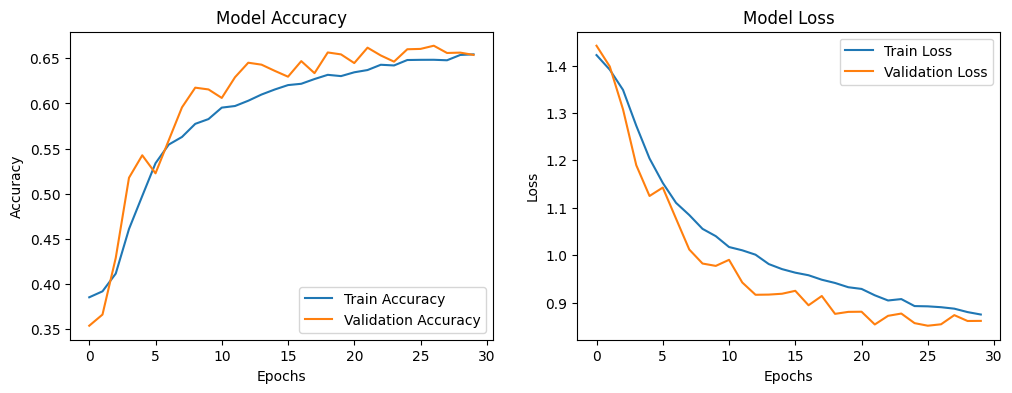

In [65]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


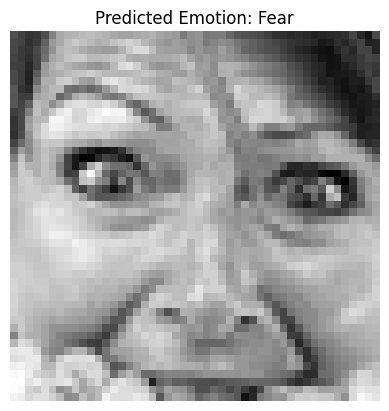

The predicted class index is: 2
The predicted emotion is: Fear


In [69]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path):
    """Load and preprocess an image for prediction."""
    img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array.astype('float32') / 255.0  # Normalize to [0, 1]
    return img_array

def predict_image_class(model, img_array):
    """Predict the class of an image using the trained model."""
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest probability
    return predicted_class[0]

# Path to the image you want to test
test_image_path = 'test/fear/PrivateTest_24920316.jpg'  # Replace with your image path

# Load and preprocess the image
test_image = load_and_preprocess_image(test_image_path)

# Predict the class
predicted_class = predict_image_class(model, test_image)

# Class labels corresponding to the indices
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_label = class_labels[predicted_class]

# Display the result
plt.imshow(test_image[0].reshape(48, 48), cmap='gray')  # Show the image
plt.title(f'Predicted Emotion: {predicted_label}')
plt.axis('off')
plt.show()

print(f'The predicted class index is: {predicted_class}')
print(f'The predicted emotion is: {predicted_label}')


In [70]:
# Save the model
model.save('emotion_detection_model.h5')
print("Model saved as 'emotion_detection_model.h5'")

Model saved as 'emotion_detection_model.h5'
